In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

import os
import time
import math

import tensorflow as tf
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import keras
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


## **Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) **

In [3]:
f = h5.File("SVHN_single_grey1.h5", "r")

In [4]:
type(f)
for key in f.keys():
    print(key)

h5py._hl.files.File

X_test
X_train
X_val
y_test
y_train
y_val


In [5]:
# Load the training, test and validation set
X_train = f['X_train'][:]
y_train = f['y_train'][:]
X_test = f['X_test'][:]
y_test = f['y_test'][:] 
X_val = f['X_val'][:]
y_val = f['y_val'][:]

In [6]:
f['X_test'].shape
f['X_train'].shape
f['X_val'].shape
f['y_test'].shape
f['y_train'].shape
f['y_val'].shape

(18000, 32, 32)

(42000, 32, 32)

(60000, 32, 32)

(18000,)

(42000,)

(60000,)

<Figure size 1440x144 with 0 Axes>

(-0.5, 31.5, 31.5, -0.5)

label for each of the below image: 0


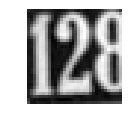

In [7]:
plt.figure(figsize=(20, 2)) #width 10, height 1

plt.subplot(1, 10, 1)
plt.imshow(X_train[0], cmap="gray")
plt.axis('off')
print('label for each of the below image: %s' % (np.argmax(y_train[0:10][1])))
plt.show()

Text(0.5, 1.0, '2')

Text(0.5, 1.0, '6')

Text(0.5, 1.0, '7')

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '0')

Text(0.5, 1.0, '3')

Text(0.5, 1.0, '0')

Text(0.5, 1.0, '7')

Text(0.5, 1.0, '3')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Label for each of the below images:  [2 6 7 4 4 0 3 0 7 3]


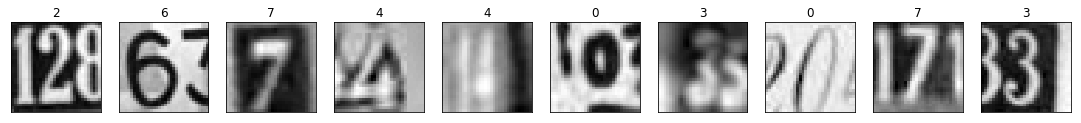

In [8]:
#Visualize few sample images
fig, axes = plt.subplots(1, 10,figsize=(19, 18), sharey=True, sharex=True)

for i in range(10):
    axes[i].imshow(X_train[i].reshape(32,32),cmap=plt.get_cmap('gray'))
    axes[i].set_title(y_train[i])
    
plt.xticks([])
plt.yticks([])

print('Label for each of the below images: ', y_train[0:10])

# **Data fetching and understand the train/val/test splits**

In [9]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(X_train.shape[1:3], X_test.shape[1:3])
print(X_train[1].shape, X_test[3].shape)
print(X_train.shape[0], Y_train.shape[0], X_test.shape[0], Y_test.shape[0])

(32, 32) (32, 32)
(32, 32, 1) (32, 32, 1)
42000 42000 18000 18000


In [10]:
#Prepare flattened pixel array
ind=0
x_train_knn=[]
for i in X_train:
    x_train_knn.append(np.array(X_train[ind]).flatten())
    ind=ind+1
print(ind, x_train_knn[1].shape, type(x_train_knn))


42000 (1024,) <class 'list'>


In [11]:

ind=0
x_test_knn=[]
for i in X_test:
    x_test_knn.append(np.array(X_test[ind]).flatten())
    ind=ind+1
print(ind, x_test_knn[1].shape, type(x_test_knn))

18000 (1024,) <class 'list'>


# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5points)

In [48]:
# Train the model with KNN Classifier
kNN_model = KNeighborsClassifier(n_neighbors = 3)
kNN_model.fit(x_train_knn,Y_train)


y_predict = kNN_model.predict(x_test_knn)


      


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
##Use kfold cross validation to get no of neighbours

# creating odd list of K for KNN
myList = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_knn, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

## Print the classification metric report (2.5 points)

In [52]:
print(classification_report(Y_test, y_predict.round()))

print("Accuracy : ", metrics.accuracy_score(y_predict.round(), Y_test))
      


              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1814
           1       0.62      0.51      0.56      1828
           2       0.74      0.40      0.52      1803
           3       0.56      0.27      0.37      1719
           4       0.78      0.51      0.61      1812
           5       0.58      0.25      0.35      1768
           6       0.54      0.29      0.37      1832
           7       0.80      0.54      0.65      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

   micro avg       0.64      0.38      0.47     18000
   macro avg       0.63      0.38      0.47     18000
weighted avg       0.63      0.38      0.47     18000
 samples avg       0.38      0.38      0.38     18000

Accuracy :  0.3783888888888889


C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


## Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [33]:
#Initialize variables
BATCH_SIZE = 30
EPOCHS = 10
PATIENCE = 3


## ● Understand and be able to implement (vectorized) backpropagation (cos stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)


In [36]:
## Without Batch Normalization - just to show its effects
# Define Model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))  

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model1.add(Dropout(0.25))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
    
# model1 Dropout
model2_dnn.add(Dropout(0.5))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
cb_list = [early_stopping]

# Train the model
model1.fit(X_train, Y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(X_test, Y_test), callbacks=cb_list)

loss_and_metrics = model2_dnn.evaluate(X_test, Y_test)
print(loss_and_metrics)


C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  
C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 65s 2ms/step - loss: 2.2994 - acc: 0.1184 - val_loss: 2.2896 - val_acc: 0.1688
Epoch 2/10
42000/42000 [==============================] - 73s 2ms/step - loss: 2.2359 - acc: 0.2023 - val_loss: 2.0132 - val_acc: 0.3054
Epoch 3/10
42000/42000 [==============================] - 64s 2ms/step - loss: 1.5715 - acc: 0.4941 - val_loss: 1.1624 - val_acc: 0.6552
Epoch 4/10
42000/42000 [==============================] - 61s 1ms/step - loss: 1.0685 - acc: 0.6758 - val_loss: 0.8954 - val_acc: 0.7379
Epoch 5/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.7971 - acc: 0.7626 - val_loss: 0.6832 - val_acc: 0.8086
Epoch 6/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.6481 - acc: 0.8111 - val_loss: 0.5730 - val_acc: 0.8397
Epoch 7/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.5548 - acc: 0.8387 - val_loss: 0.5624 - val_acc

18000/18000 [==============================] - 8s 464us/step
[0.4712336314121882, 0.8648888888888889]


## Implement batch normalization for training the neural network (2.5 points)

In [37]:
## With batch normalization. Final model.
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(BatchNormalization())
model2.add(Activation('relu'))  

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
    
# More Dropout
model2.add(Dropout(0.5))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    

C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  
C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [40]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
cb_list = [early_stopping]

# Train the model
model2.fit(X_train, Y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(X_test, Y_test), callbacks=cb_list)

C:\Users\rajan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 118s 3ms/step - loss: 1.7371 - acc: 0.3768 - val_loss: 0.9244 - val_acc: 0.7244
Epoch 2/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.8533 - acc: 0.7286 - val_loss: 0.6334 - val_acc: 0.8046
Epoch 3/10
42000/42000 [==============================] - 119s 3ms/step - loss: 0.6982 - acc: 0.7820 - val_loss: 0.6019 - val_acc: 0.8219
Epoch 4/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.6200 - acc: 0.8043 - val_loss: 0.5406 - val_acc: 0.8419
Epoch 5/10
42000/42000 [==============================] - 121s 3ms/step - loss: 0.5814 - acc: 0.8189 - val_loss: 0.4783 - val_acc: 0.8566
Epoch 6/10
42000/42000 [==============================] - 120s 3ms/step - loss: 0.5507 - acc: 0.8255 - val_loss: 0.4505 - val_acc: 0.8681
Epoch 7/10
42000/42000 [==============================] - 117s 3ms/step - loss: 0.5221 - acc: 0.8368 - val_loss: 0.5017 - 

In [41]:
loss_and_metrics1 = model2.evaluate(X_test, Y_test)
print(loss_and_metrics1)


18000/18000 [==============================] - 17s 958us/step
[0.47618052507771386, 0.8617777777777778]


In [44]:
from sklearn.metrics import classification_report
y_pred=model2.predict(X_test, batch_size=200, verbose=2)


In [47]:
print(classification_report(Y_test, y_pred.round()))


              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1814
           1       0.98      0.64      0.78      1828
           2       0.94      0.87      0.90      1803
           3       0.92      0.77      0.84      1719
           4       0.95      0.84      0.89      1812
           5       0.90      0.85      0.87      1768
           6       0.93      0.78      0.85      1832
           7       0.95      0.84      0.89      1808
           8       0.97      0.74      0.84      1812
           9       0.94      0.78      0.85      1804

   micro avg       0.94      0.79      0.86     18000
   macro avg       0.95      0.79      0.86     18000
weighted avg       0.95      0.79      0.86     18000
 samples avg       0.79      0.79      0.79     18000



C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
